In [8]:
import tensorflow as tf

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
data=[]
labels=[]
classes=43
cur_path='C:\\Users\\is-os\\Desktop\\archive'


In [12]:
#retrieving images and labels 
for i in range(classes):
    path=os.path.join(cur_path,'Train',str(i))
     #print(path)
    images=os.listdir(path)
    #print(images)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image=image.resize((30,30))
            image=np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print(f'error loading image{a}')
    

In [13]:
#change data to array
data = np.array(data)
labels = np.array(labels)
print(data)

[[[[ 75  78  80]
   [ 74  76  78]
   [ 85  86  84]
   ...
   [ 68  75  74]
   [ 65  69  68]
   [ 66  67  66]]

  [[ 83  84  86]
   [ 80  80  82]
   [ 88  88  83]
   ...
   [ 73  77  78]
   [ 76  78  75]
   [ 80  80  78]]

  [[ 78  78  80]
   [ 86  85  86]
   [ 90  89  90]
   ...
   [ 71  74  71]
   [ 73  74  69]
   [ 78  78  74]]

  ...

  [[133 134 139]
   [123 127 132]
   [112 121 125]
   ...
   [ 94  95  89]
   [ 97  98  91]
   [ 99 103  99]]

  [[ 91  95  99]
   [ 91  98 103]
   [ 75  86  90]
   ...
   [104 102  96]
   [110 113 104]
   [ 96 104  98]]

  [[ 85  84  87]
   [ 95 101 107]
   [ 63  76  81]
   ...
   [103 103  95]
   [ 99 102  90]
   [ 90  97  89]]]


 [[[ 69  73  73]
   [ 76  79  79]
   [ 75  77  77]
   ...
   [ 76  81  80]
   [ 71  77  77]
   [ 66  68  70]]

  [[ 65  69  69]
   [ 74  76  76]
   [ 84  84  83]
   ...
   [ 90  83  89]
   [ 74  79  84]
   [ 67  69  73]]

  [[ 63  68  68]
   [ 71  72  72]
   [ 81  79  77]
   ...
   [105  86  91]
   [ 71  75  76]
   [ 69  71

In [14]:
print(data.shape,labels.shape)

(39209, 30, 30, 3) (39209,)


In [15]:
#split data
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42,shuffle=True)

In [16]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [17]:
#rescale data 
X_train=X_train/255
X_test=X_test/255

In [18]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [19]:
#building model architecture
MODEL=Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=X_train.shape[1:]),
    Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(rate=0.25),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(rate=0.25),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(rate=0.5),
    Dense(43, activation='softmax')
    
])

In [20]:
#defining learning rate,epochs and nessessary things to build the model
lr = 0.001
epochs = 30

opt = Adam(learning_rate=lr, decay=lr / (epochs * 0.5))
MODEL.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [21]:
#fit data to train and validate it
hist = MODEL.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/30
981/981 [==============================] - 26s 18ms/step - loss: 1.3644 - accuracy: 0.6158 - val_loss: 0.1622 - val_accuracy: 0.9628
Epoch 2/30
981/981 [==============================] - 16s 16ms/step - loss: 0.2667 - accuracy: 0.9187 - val_loss: 0.0826 - val_accuracy: 0.9767
Epoch 3/30
981/981 [==============================] - 16s 16ms/step - loss: 0.1564 - accuracy: 0.9503 - val_loss: 0.0396 - val_accuracy: 0.9898
Epoch 4/30
981/981 [==============================] - 16s 16ms/step - loss: 0.1153 - accuracy: 0.9653 - val_loss: 0.0331 - val_accuracy: 0.9913
Epoch 5/30
981/981 [==============================] - 16s 16ms/step - loss: 0.0887 - accuracy: 0.9726 - val_loss: 0.0276 - val_accuracy: 0.9927
Epoch 6/30
981/981 [==============================] - 16s 16ms/step - loss: 0.0707 - accuracy: 0.9785 - val_loss: 0.0214 - val_accuracy: 0.9946
Epoch 7/30
981/981 [==============================] - 16s 16ms/step - loss: 0.0650 - accuracy: 0.9790 - val_loss: 0.0208 - val_accuracy:

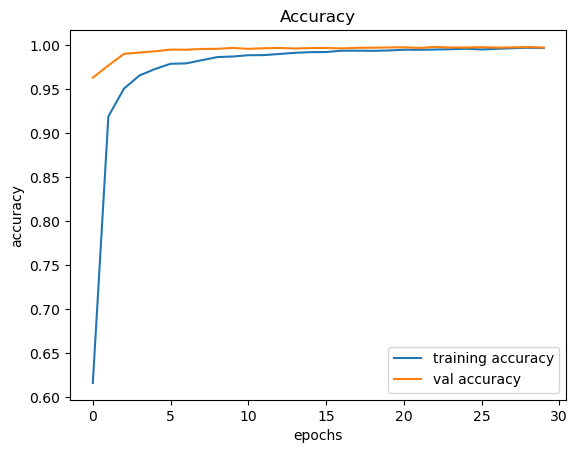

In [22]:
#ploting the performances
plt.figure(0)
plt.plot(hist.history['accuracy'], label='training accuracy')
plt.plot(hist.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

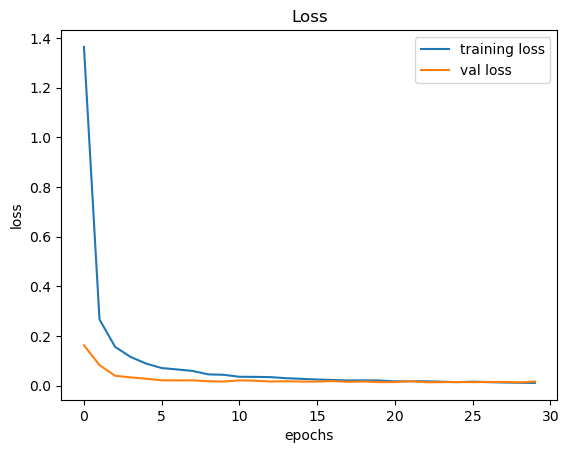

In [23]:
#plot the losses
plt.figure(1)
plt.plot(hist.history['loss'], label='training loss')
plt.plot(hist.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


In [24]:
#the data has a csv file that contain the names and numbers for classes, it has a column for the  pictures' path and 
#column for labels
testdata = pd.read_csv('C:\\Users\\is-os\\Desktop\\archive\\Test.csv')

t_labels = testdata["ClassId"].values
imgs = testdata["Path"].values


In [25]:
#same steps as the training(open,resize,convert to array and rescale)
t_data =[]

for img in imgs:
	try:
		image = Image.open(cur_path+"\\"+img)
		image = image.resize((30,30))
		t_data.append(np.array(image))
	except:
		print(f"error in {img}")
X_test=np.array(t_data)
X_test = X_test/255



In [26]:
print(X_test)

[[[[0.45490196 0.54901961 0.68627451]
   [0.45490196 0.54117647 0.67058824]
   [0.46666667 0.54117647 0.67843137]
   ...
   [0.4        0.46666667 0.58823529]
   [0.39607843 0.47843137 0.58431373]
   [0.36470588 0.43921569 0.54509804]]

  [[0.45490196 0.55686275 0.69411765]
   [0.45490196 0.55294118 0.68627451]
   [0.45882353 0.55294118 0.68235294]
   ...
   [0.47058824 0.56078431 0.69803922]
   [0.47843137 0.56470588 0.69019608]
   [0.47843137 0.55686275 0.68235294]]

  [[0.4627451  0.55686275 0.68235294]
   [0.45490196 0.55294118 0.68627451]
   [0.44705882 0.54901961 0.6745098 ]
   ...
   [0.4745098  0.56470588 0.70980392]
   [0.47843137 0.56470588 0.70588235]
   [0.46666667 0.55686275 0.69803922]]

  ...

  [[0.45882353 0.5372549  0.65882353]
   [0.45098039 0.52941176 0.64705882]
   [0.45490196 0.52941176 0.64313725]
   ...
   [0.45490196 0.54117647 0.66666667]
   [0.45490196 0.53333333 0.65882353]
   [0.4627451  0.54509804 0.67058824]]

  [[0.45490196 0.53333333 0.65098039]
   [0.4

In [27]:
#run the prediction
pred = MODEL.predict_classes(X_test)

C:\Users\is-os\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [28]:
#showing metrics data
from sklearn.metrics import accuracy_score
#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(t_labels, pred)*100)

Test Data accuracy:  97.84639746634997


In [29]:
from sklearn.metrics import classification_report

print(classification_report(t_labels, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.97      1.00      0.98       720
           2       0.99      0.99      0.99       750
           3       1.00      0.96      0.98       450
           4       1.00      0.97      0.99       660
           5       0.94      0.99      0.96       630
           6       1.00      0.87      0.93       150
           7       0.98      1.00      0.99       450
           8       1.00      0.98      0.99       450
           9       0.98      1.00      0.99       480
          10       1.00      1.00      1.00       660
          11       0.93      0.99      0.96       420
          12       1.00      0.98      0.99       690
          13       1.00      1.00      1.00       720
          14       1.00      1.00      1.00       270
          15       0.98      1.00      0.99       210
          16       0.99      1.00      0.99       150
          17       1.00    

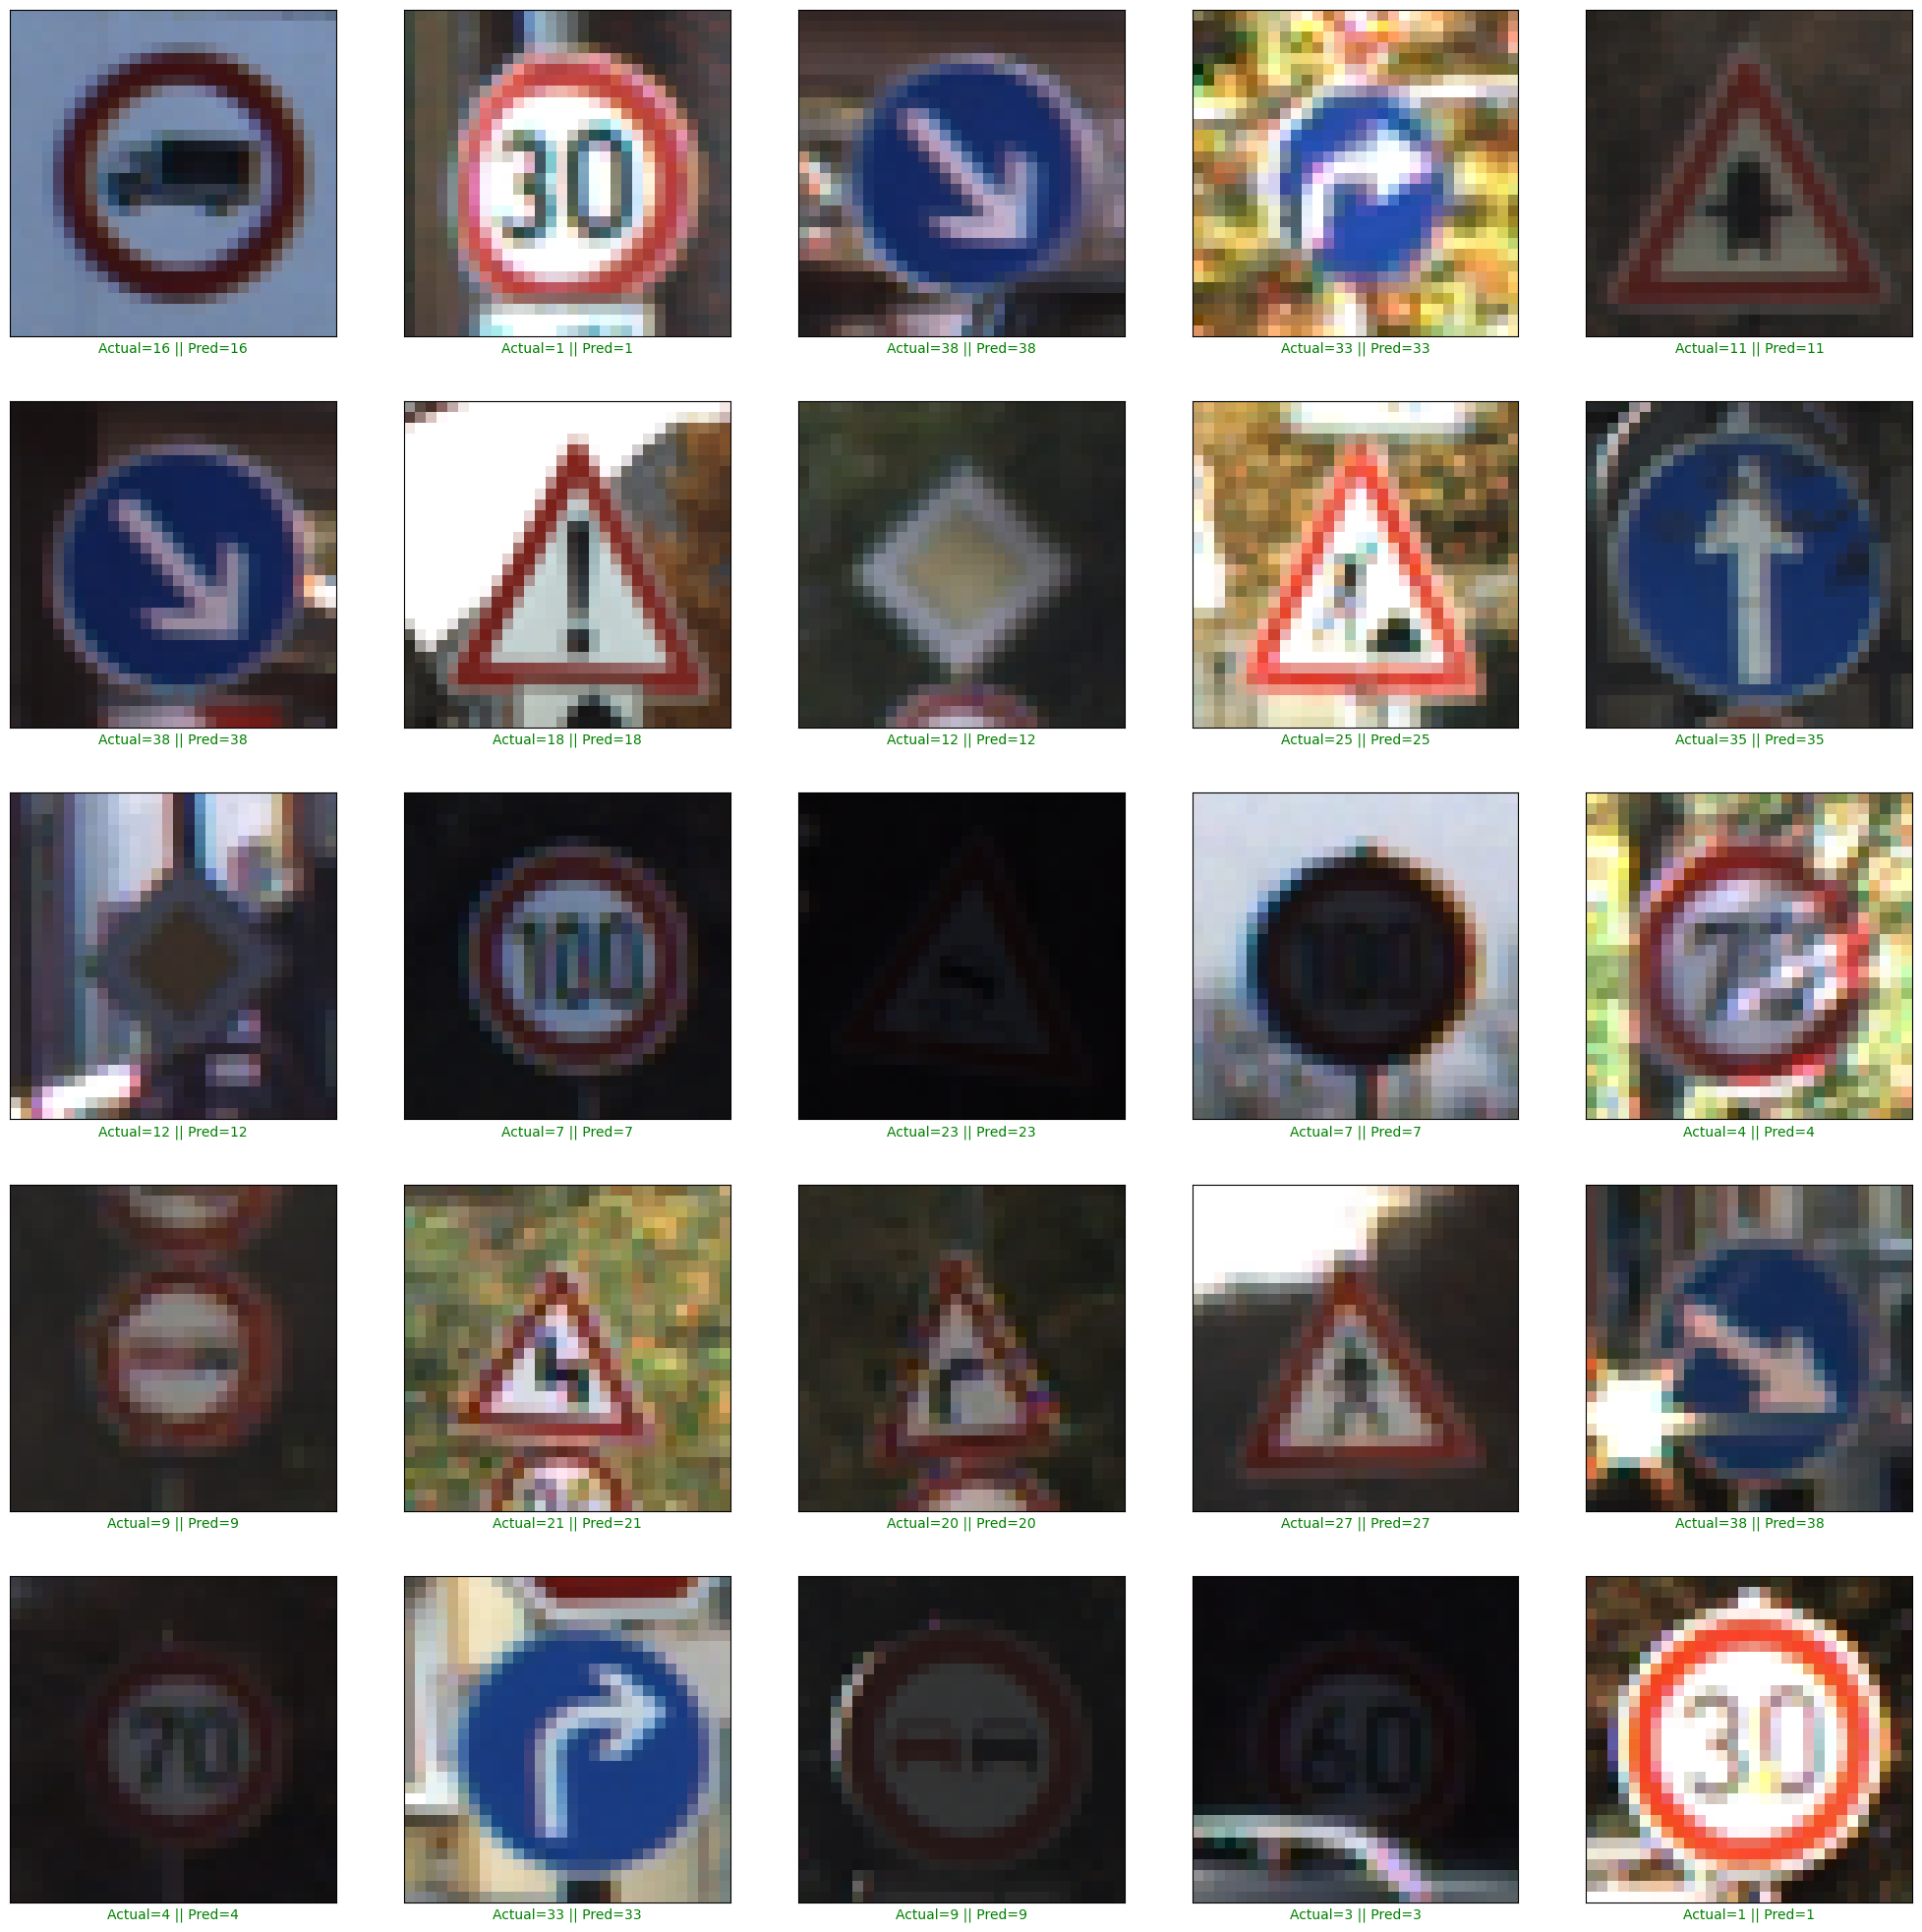

In [30]:
#ploting the results 
plt.figure(figsize = (25, 25))

index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[index + i]
    actual = t_labels[index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[index + i])
plt.show()

In [31]:
# save for future uses 
MODEL.save('traffic_new.h5')